# Import

In [1]:
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from cycler import cycler
import matplotlib.colors as colors

In [2]:
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Reading files

In [3]:
# folder="/home/gorbunov8a/data/shell_to_shell/Rl90_N256/run1/"
# Rl = 90; N=256
# nb = 10858

# folder="/home/gorbunov8a/data/shell_to_shell/Rl160_N512/run1/"
# Rl = 160; N=512
# nb = 222

folder="/home/gorbunov8a/data/shell_to_shell/Rl250_N1024/"
Rl = 250; N=1024
nb = 156

file_type = "shell_to_shell_transfer_positive_part_ite="
file = folder + file_type + "%06d" % nb + ".table"
file_data = []
for line in open(file) :
    temp_array_line = []
    if line[0] == '#' :          #skip commented lines
        continue
    else :
        temp_array_line=list(map(float, line.split( )))
        file_data.append(temp_array_line)  
k = np.array(file_data[0])
nb_of_modes = np.array(file_data[1])
T_pos = np.array(file_data[2:])
del file_data

file_type = "shell_to_shell_transfer_negative_part_ite="
file = folder + file_type + "%06d" % nb + ".table"
file_data = []
for line in open(file) :
    temp_array_line = []
    if line[0] == '#' :          #skip commented lines
        continue
    else :
        temp_array_line=list(map(float, line.split( )))
        file_data.append(temp_array_line)  
k = np.array(file_data[0])
nb_of_modes = np.array(file_data[1])
T_neg = np.array(file_data[2:])
del file_data

In [4]:
# read the spectrum
file_type = "vel_spec_kstar_ite="
nb = 1800
nb = 0
file = folder + file_type + "%06d" % nb + ".table"
file_data = []
for line in open(file) :
    temp_array_line = []
    if line[0] == '#' :          #skip commented lines
        continue
    else :
        temp_array_line=list(map(float, line.split( )))
        file_data.append(temp_array_line)  
spec_table = np.array(file_data)
# k = spec_table[:,0]
# nb_of_modes = spec_table[:,1]
Ek = spec_table[:,2]
del file_data

In [5]:
# T_neg = T_neg[:-1, :-1]
# T_pos = T_pos[:-1, :-1]

In [6]:
T = T_neg + T_pos

In [7]:
k.shape

(33,)

In [8]:
nb_of_modes.shape

(33,)

In [9]:
T.shape

(33, 33)

# Parameters

In [10]:
# PARAMETERS
nu = 0.0001
pi = np.pi
if (Rl == 60) :
    lmbda = 0.378
    eta = 0.0254807  
    L = 2.23  
    dissipation_rate = 0.2244E-5
    e_kine = 0.39
if (Rl == 90) :
    lmbda = 0.2352
    eta = 0.126e-1
    dissipation_rate = 0.3919e-4
    L = 2.2
if (Rl == 160) :
    lmbda = 0.155
    eta = 0.006436  
    L = 2.2
    dissipation_rate = 0.6E-3 
if (Rl == 250) :
    lmbda = 0.1
    eta = 0.32e-2  
    L = 2.15
    dissipation_rate = 0.94e-2 

t0=dissipation_rate**(-1.0/3.0)*L**(2.0/3.0) #large scale eddy-turnover time
spatial_scales = np.array([L, lmbda, eta])
wn_scales = 2.0*np.pi/spatial_scales

# Plot appereance

In [11]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.rc('axes', prop_cycle=cycler(cycler(linestyle=['-', '--', ':', '-.'])*cycler(color=colors)))
plt.rc('axes', labelsize=12)  
plt.rc('axes', titlesize=12)  
plt.rc('legend', fontsize=10)

# Energy spectrum

<IPython.core.display.Javascript object>


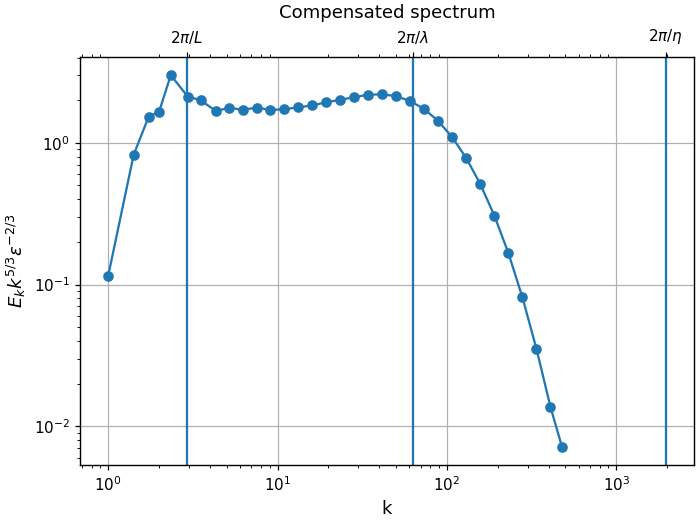

In [12]:
fig, ax = plt.subplots(constrained_layout=True)

ax.plot(k, Ek*k**(5.0/3.0)*dissipation_rate**(-2.0/3.0), '-o')
ax.set(xscale='log', yscale='log', xlabel='k', ylabel=r'$E_k k^{5/3} \epsilon^{-2/3}$', title='Compensated spectrum'); ax.grid()

vertical_lines=wn_scales
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()

# Dissipation spectrum

<IPython.core.display.Javascript object>


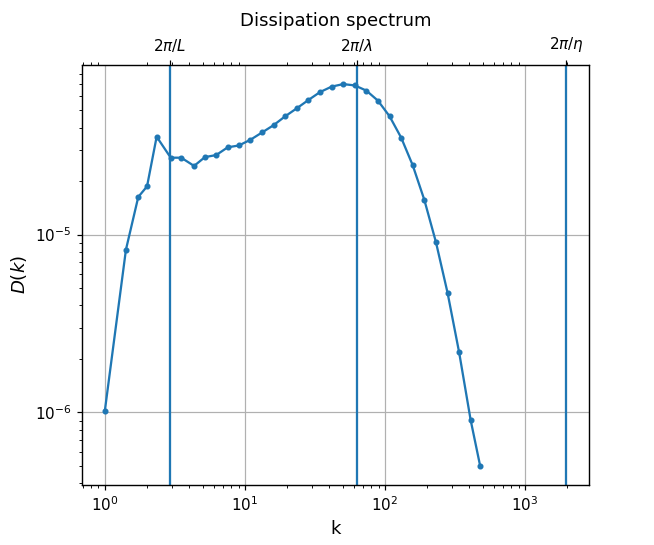

In [13]:
fig, ax = plt.subplots(figsize=(6,5))

ax.plot(k, 2.0*nu*Ek*k**(2.0), '.-')
ax.set(xlabel='k', ylabel=r'$D(k)$', title='Dissipation spectrum'); ax.grid()
ax.set(xscale='log', yscale='log')
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()

# Energy transfer spectrum

<IPython.core.display.Javascript object>


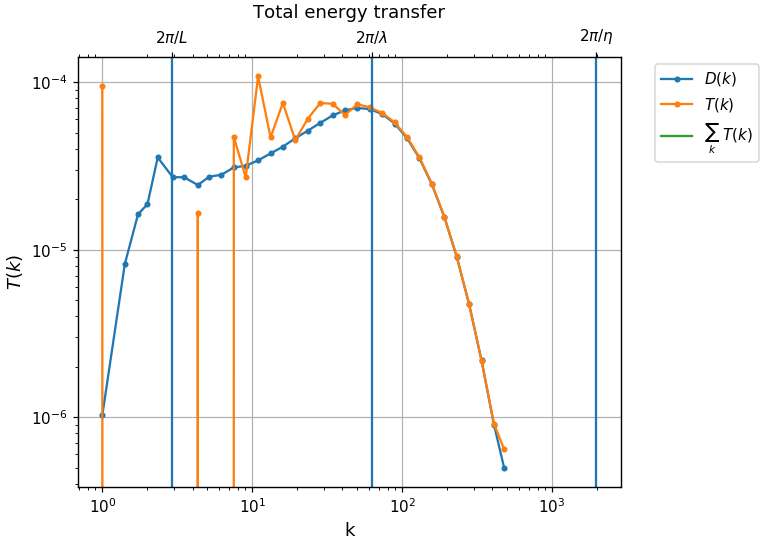

In [14]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
coef = 4.0*pi*(k**2.0)/nb_of_modes
total_transfer1 = np.sum(T, axis=0)
total_transfer2 = -np.sum(T, axis=1)
total_transfer = 0.5*(total_transfer1+total_transfer2)*coef
#total_transfer = total_transfer2*coef
ax.plot(k, 2.0*nu*Ek*k**(2.0), '.-', label='$D(k)$')
ax.plot(k, total_transfer, '.-', label=r'$T(k)$')
#ax.plot(k, total_transfer-2.0*nu*Ek*k**(2.0), '.-', label=r'$T(k)-D(k)$')
ax.plot(k, np.full_like(k, np.sum(T)), label=r'$\sum_k  \ T(k)$')
ax.set(xlabel='k', ylabel=r'$T(k)$', title='Total energy transfer'); ax.grid()
ax.set(xscale='log', yscale='log')
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale=ax.get_xscale(), yscale=ax.get_yscale(), xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


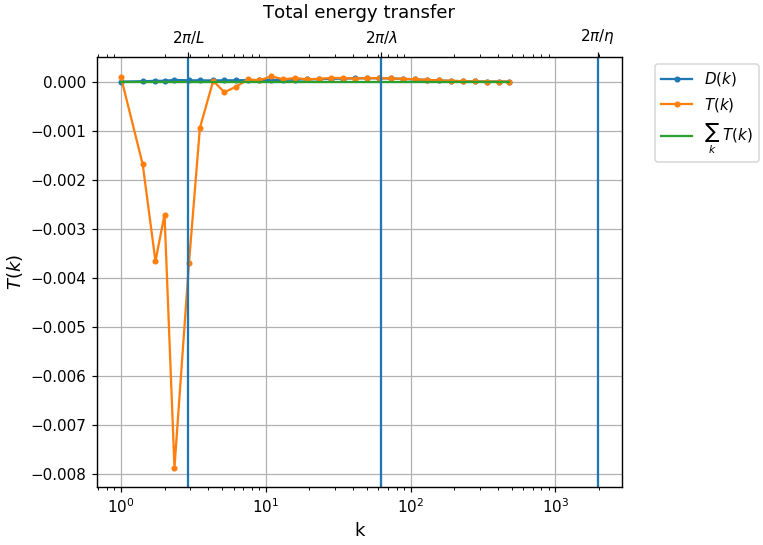

In [15]:
fig, ax = plt.subplots(figsize=(7,5), constrained_layout=True)
coef = 4.0*pi*(k**2.0)/nb_of_modes
total_transfer1 = np.sum(T, axis=0)
total_transfer2 = -np.sum(T, axis=1)
total_transfer = 0.5*(total_transfer1+total_transfer2)*coef
#total_transfer = total_transfer2*coef
ax.plot(k, 2.0*nu*Ek*k**(2.0), '.-', label='$D(k)$')
ax.plot(k, total_transfer, '.-', label=r'$T(k)$')
#ax.plot(k, total_transfer-2.0*nu*Ek*k**(2.0), '.-', label=r'$T(k)-D(k)$')
ax.plot(k, np.full_like(k, np.sum(T)), label=r'$\sum_k  \ T(k)$')
ax.set(xlabel='k', ylabel=r'$T(k)$', title='Total energy transfer'); ax.grid()
ax.set(xscale='log', yscale='linear')
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale=ax.get_xscale(), yscale=ax.get_yscale(), xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
#total dissipation rate (epsilon)
print(np.trapz(2.0*nu*Ek*k**(2.0), x=k))
print(dissipation_rate)

0.00959978448074527
0.0094


# Energy flux

<IPython.core.display.Javascript object>


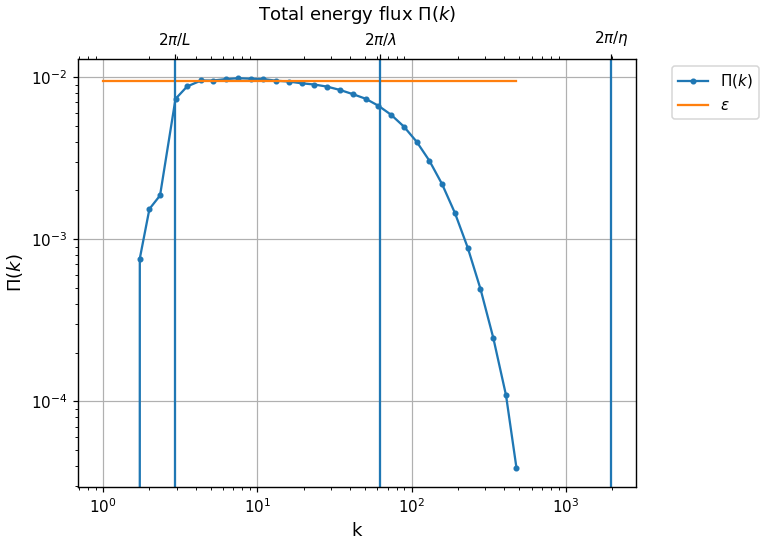

In [17]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(7,5))
flux = np.zeros(shape=k.shape[0], dtype=float) 
flux_int = np.zeros(shape=k.shape[0], dtype=float) 
for ik in list(range(k.shape[0])) :
    #flux_int[ik] = -np.trapz(total_transfer[:ik], x=k[:ik])
    flux[ik] = -np.sum(total_transfer1[:ik])
ax.plot(k, flux, '.-', label=r'$\Pi(k)$')
#ax.plot(k, flux_int, '.-', label=r'$\Pi(k)$')
ax.plot(k, np.full_like(k, dissipation_rate), '-', label=r'$\epsilon$')
ax.set(xlabel='k', ylabel=r'$\Pi(k)$', title=r'Total energy flux $\Pi(k)$'); ax.grid()
ax.set(xscale='log', yscale='log')
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot shell-to-shell energy transfer matrix

In [18]:
norm_coef = 1.0/np.max([np.max(np.abs(T_neg)), np.max(np.abs(T_pos))])

<IPython.core.display.Javascript object>


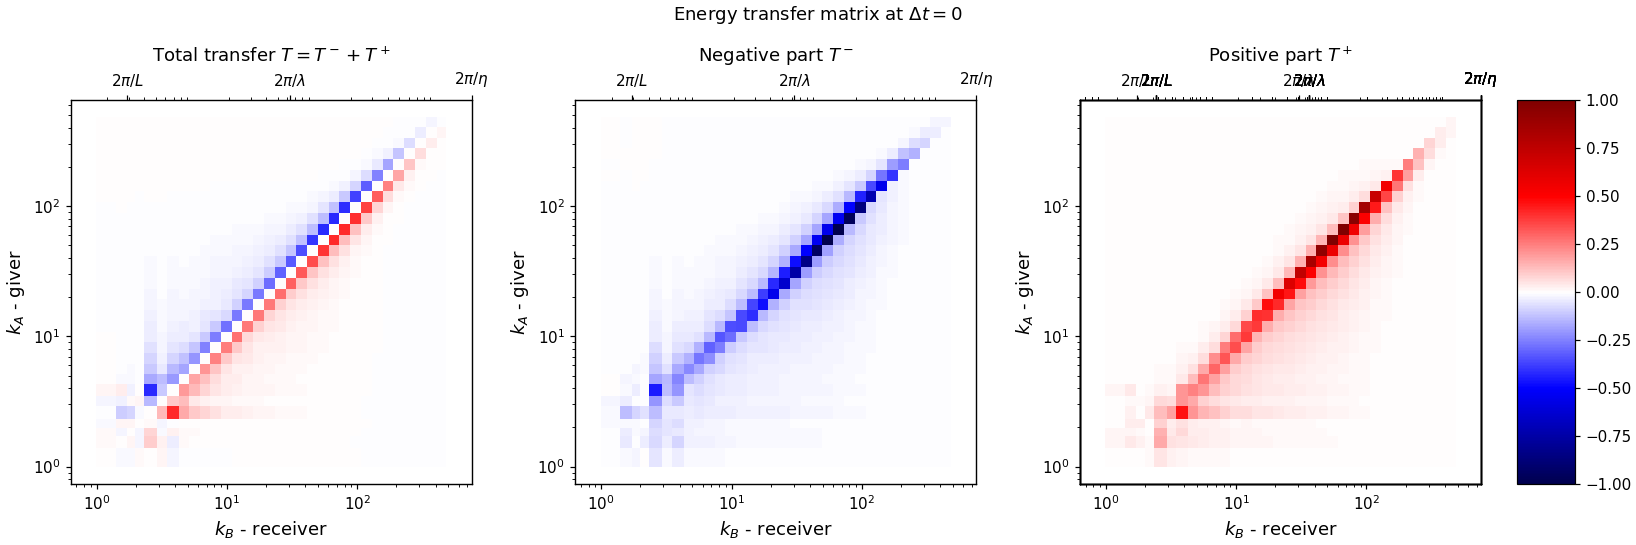

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5),constrained_layout=True)
ax[0].pcolormesh(k, k, (T_pos + T_neg) * norm_coef, cmap='seismic', vmin=-1.0, vmax=1.0); ax[0].set(title='Total transfer $T = T^-+ T^+$')
ax[1].pcolormesh(k, k, (T_neg) * norm_coef, cmap='seismic', vmin=-1.0, vmax=1.0); ax[1].set(title=r'Negative part $T^-$')
im = ax[2].pcolormesh(k, k, (T_pos) * norm_coef, cmap='seismic', vmin=-1.0, vmax=1.0); ax[2].set(title=r'Positive part $T^+$')
for iax in ax :
    iax.set(xlabel=r'$k_B$ - receiver', ylabel=r'$k_A$ - giver', xscale='log', yscale='log')
    iax.set_aspect('equal', 'datalim')
    ax2 = iax.twiny()
    ax2.set(xscale='log', yscale='log', xlim = iax.get_xlim())
    ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
fig.colorbar(im)
fig.suptitle(r'Energy transfer matrix at $\Delta t =0$')
plt.show()

<IPython.core.display.Javascript object>


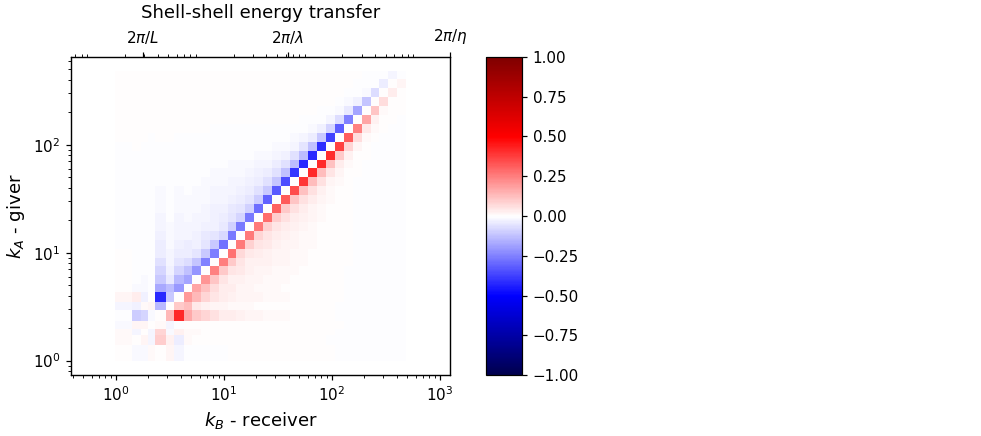

In [93]:
#only total transfer
fig, [ax, pl] = plt.subplots(nrows=1, ncols=2, figsize=(9,4), constrained_layout=True)
im = ax.pcolormesh(k, k, (T_pos + T_neg) * norm_coef, cmap='seismic', vmin=-1.0, vmax=1.0); ax.set(title='Shell-shell energy transfer')
ax.set(xlabel=r'$k_B$ - receiver', ylabel=r'$k_A$ - giver', xscale='log', yscale='log')
ax.set_aspect('equal', 'datalim')
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = iax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
fig.colorbar(im)
pl.axis('off') 
pp = PdfPages('Images/Correlations/transfer_matrix.pdf')
pp.savefig(bbox_extra_artists=(), bbox_inches='tight')
pp.close()

<IPython.core.display.Javascript object>


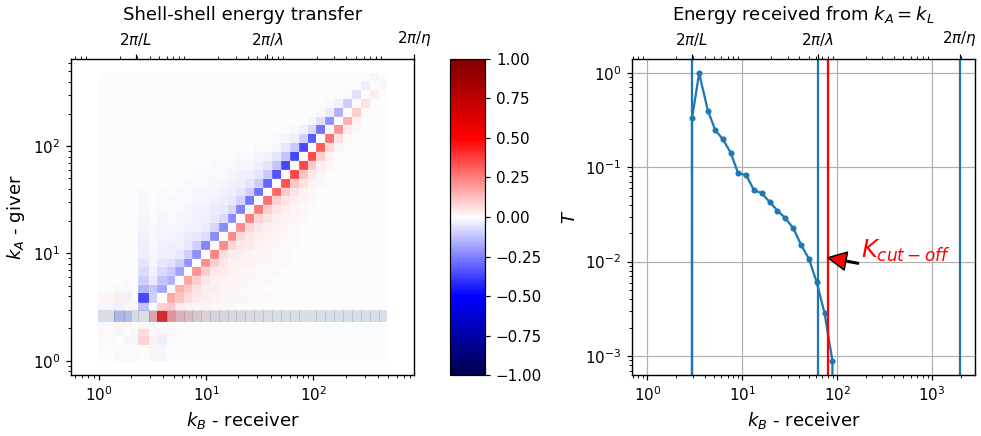

In [98]:
mask = np.full_like(T_pos, 0.0)
mask[4,:].fill(1.0)
#only total transfer
fig, [ax, pl] = plt.subplots(nrows=1, ncols=2, figsize=(9,4), constrained_layout=True)
im = ax.pcolormesh(k, k, (T_pos + T_neg) * norm_coef, cmap='seismic', vmin=-1.0, vmax=1.0); ax.set(title='Shell-shell energy transfer')
ax.pcolormesh(k, k, mask, cmap='RdBu', vmin=-1.0, vmax=1.0, alpha=0.15)
ax.set(xlabel=r'$k_B$ - receiver', ylabel=r'$k_A$ - giver', xscale='log', yscale='log')
#ax.annotate(r'k_L', xy=(0, 2.3),  xycoords='data', xytext=(-0.1, 2.3), textcoords='data', arrowprops=dict(facecolor='black', width=1), size='10')
ax.set_aspect('equal', 'datalim')
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='log', xlim = iax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
fig.colorbar(im)

ikf = 4
pl.plot(k, T[ikf, :]/np.max(abs(T)),  '.-')
pl.set(xlabel=r'$k_B$ - receiver', ylabel=r'$T$', xscale='log', yscale='log', title=r'Energy received from $k_A = k_L$'); pl.grid()
for line in vertical_lines : pl.axvline(x=line)
ax2 = pl.twiny()
ax2.set(xscale='log', yscale='log', xlim = pl.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
pl.annotate(r'$K_{cut-off}$', xy=(80, 0.011),  xycoords='data', xytext=(180, 0.011), textcoords='data', arrowprops=dict(facecolor='red', width=1), size='16', color='red')
pl.axvline(x=80, color='red')
#fig.suptitle(r'Energy transfer matrix at $\Delta t =0$')
plt.show()

pp = PdfPages('Images/Correlations/transfer_matrix_forcing_band.pdf')
pp.savefig(bbox_extra_artists=(), bbox_inches='tight')
pp.close()

In [42]:
# min_val=10e-3
# cmap = 'BuGn'
# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5),constrained_layout=True)
# ax[0].pcolormesh(k, k, np.abs(T_pos + T_neg) * norm_coef, norm=colors.LogNorm(vmin=min_val, vmax=1.0), cmap=cmap); ax[0].set(title='Total transfer $T = T^-+ T^+$')
# ax[1].pcolormesh(k, k, np.abs(T_neg) * norm_coef, norm=colors.LogNorm(vmin=min_val, vmax=1.0), cmap=cmap); ax[1].set(title=r'Negative part $T^-$')
# im = ax[2].pcolormesh(k, k, (T_pos) * norm_coef, norm=colors.LogNorm(vmin=min_val, vmax=1.0), cmap=cmap); ax[2].set(title=r'Positive part $T^+$')
# for iax in ax :
#     iax.set(xlabel=r'$k_B$ - receiver', ylabel=r'$k_A$ - giver', xscale='log', yscale='log')
#     iax.set_aspect('equal', 'datalim')
#     ax2 = iax.twiny()
#     ax2.set(xscale='log', yscale='log', xlim = iax.get_xlim())
#     ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
# fig.colorbar(im)
# fig.suptitle(r'Energy transfer matrix at $\Delta t =0$ in log colormap')
# plt.show()

## Diagonals

<IPython.core.display.Javascript object>


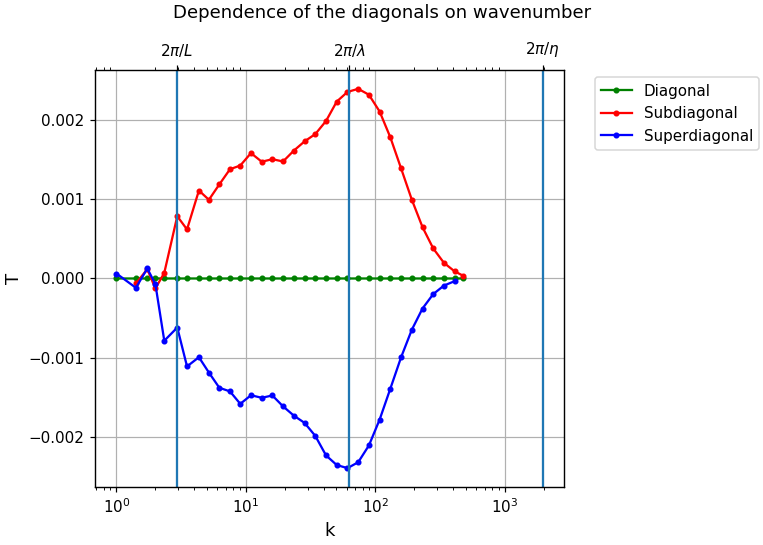

In [43]:
diag_center = T.diagonal(offset=0, axis1=0, axis2=1) #green
diag_plus = T.diagonal(offset=1, axis1=0, axis2=1)   #red
diag_minus = T.diagonal(offset=-1, axis1=0, axis2=1) #blue

fig, ax = plt.subplots(figsize=(7,5),constrained_layout=True)
ax.plot(k, diag_center, 'g.-', label='Diagonal')
ax.plot(k[1:], diag_plus, 'r.-', label='Subdiagonal')
ax.plot(k[:-1], diag_minus, 'b.-', label='Superdiagonal')
ax.set(ylabel='T')
ax.set(xlabel='k')
ax.grid()
#ax.set(ylim=[-0.5,0.3])
ax.set(xscale='log')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('Dependence of the diagonals on wavenumber') 
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='linear', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])
plt.show()
plt.show()

## Forcing band

<IPython.core.display.Javascript object>


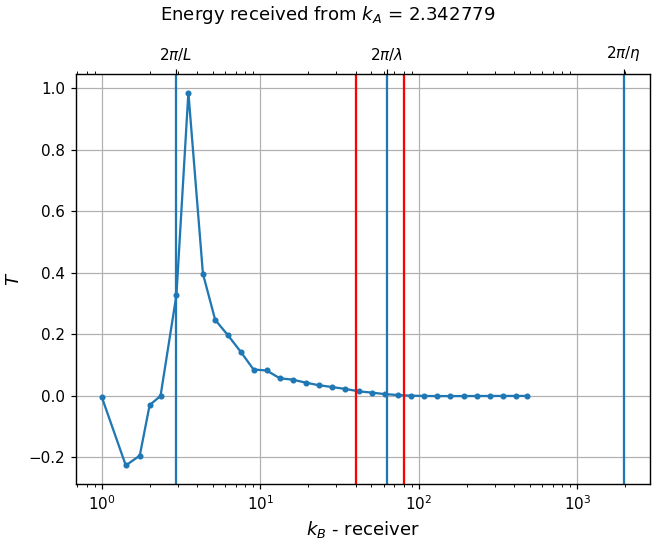

In [46]:
fig, ax = plt.subplots(figsize=(6,5),constrained_layout=True)
ikf = 4
ax.plot(k, T[ikf, :]/np.max(abs(T)),  '.-')
ax.set(xlabel=r'$k_B$ - receiver', ylabel=r'$T$', xscale='log', yscale='log'); ax.grid()
fig.suptitle(r'Energy received from $k_A$ = %f' % k[ikf]) 
for line in vertical_lines : ax.axvline(x=line)
ax2 = ax.twiny()
ax2.set(xscale='log', yscale='linear', xlim = ax.get_xlim())
ax2.set_xticks(vertical_lines); ax2.set_xticklabels([r'$2\pi/L$', r'$2\pi/\lambda$', r'$2\pi/\eta$'])

ax.axvline(x=40, color='red')
ax.axvline(x=80, color='red')
plt.show()

## Backscattering

<IPython.core.display.Javascript object>


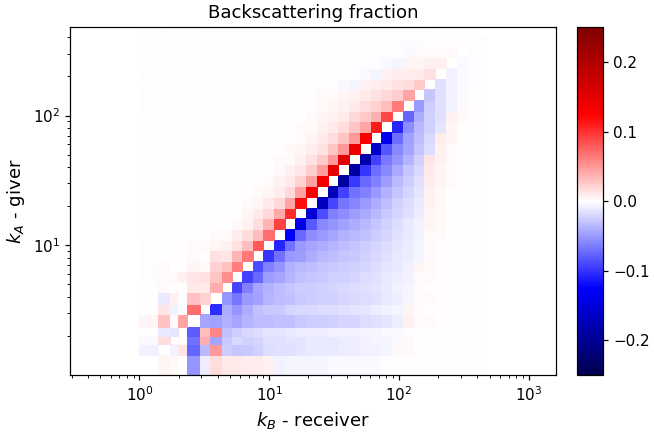

In [24]:
# compute the fraction of backscattering
bs_fraction = np.where(T < 0, T_pos*norm_coef, T_neg*norm_coef)
np.fill_diagonal(bs_fraction, 'nan')

fig, ax1 = plt.subplots(figsize=(6,4),constrained_layout=True)
im = ax1.pcolormesh(k, k, bs_fraction, cmap='seismic', vmin=-0.25, vmax=0.25)
ax1.set(xlabel=r'$k_B$ - receiver', ylabel=r'$k_A$ - giver', xscale='log', yscale='log', title='Backscattering fraction')
ax1.set_aspect('equal', 'datalim')

fig.colorbar(im)
plt.show()